## Clean and graph each CSV instead of combining

#### setup

In [28]:
import os, glob
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

# enter working directory for CSV files

# personal
#os.chdir(r"C:\Users\Zack\Desktop\work\T-Mobile\CSAM\meeting attendance")
# work
os.chdir(r"C:\Users\Zjaffen1\Desktop\CSAM data\attendance\LnLs")
# os.chdir(r"C:\Users\Zjaffen1\Desktop\CSAM data\attendance\webex")

#### get and check file names

In [29]:
# build list of file names and check
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# print list to check
# DISABLE OR LIMIT RANGE if there are a lot of files
for i in range(len(all_filenames)):
    print(all_filenames[i])

Consumer Privacy.csv
Cyberwarfare.csv
Forgotten Passwords.csv
Hacker Stories.csv
Improv Show.csv
Managing Credentials.csv
PAS and AIM Demo.csv
Privacy Matters.csv
Secure Applications.csv


function for converting entry/leave times into int minute values

In [30]:
def time_to_minutes(str_time):
    ''' takes time string in format : '12:02 pm'
        returns int of minutes      :  722'''

    time, period= str_time.split(' ')
    hour, minute = map(int, time.split(':'))
    if period.lower() == 'pm' and hour < 12:
        hour += 12
    return hour*60 + minute

#### create data frames for each CSV and clean

In [31]:
print(time_to_minutes("10:01 PM"))

1321


In [32]:

# list of dataframes for attendance data
file_df_list = [pd.read_csv(f, sep="\t", skiprows=[0,1], encoding="utf-16-le") for f in all_filenames]

# loop to clean data
cols = [] # list of col names from files
minute_lists = []
time_lists = []
num_attended = {}

for i in range(len(all_filenames)):
    # change event dates to names based on file names
    file_df_list[i].rename(columns={"Date": "Event"}, inplace = True)
    file_df_list[i]['Event'] = all_filenames[i][:len(all_filenames[i])-4]
    cols.append(all_filenames[i][:len(all_filenames[i])-4])

    # change 'Duration from string to int value
    file_df_list[i]['Duration'] = file_df_list[i]['Duration'].apply(lambda x: int(x.split(' ')[0]))

    # change start/stop time to minute value
    file_df_list[i]['Start time'] = file_df_list[i]['Start time'].apply(time_to_minutes)
    file_df_list[i]['End time'] = file_df_list[i]['End time'].apply(time_to_minutes)

    # meeting start and end
    start = file_df_list[i]['Start time'].min()
    end = file_df_list[i]['End time'].max()
    diff = end - start

    # create absolute minutes columns
    file_df_list[i]['Min Joined'] = file_df_list[i]['Start time'].apply(lambda x: x - start)
    file_df_list[i]['Min Left'] = file_df_list[i]['End time'].apply(lambda x: x - start)

    # initial minutes counter
    diffs = [0] * (file_df_list[i]['Min Left'].max() + 1)
    mins = [0] * (file_df_list[i]['Min Left'].max() + 1)

    # iterate through rows and add/subtract to minute attendance, track email attendance
    for index, row in file_df_list[i].iterrows():
        diffs[row['Min Joined']] += 1
        diffs[row['Min Left']] -= 1
        email = row['Email'].lower()
        if email in num_attended:
            if num_attended[email] < 9:
                num_attended[email] += 1
        else:
            num_attended[email] = 1
    
    total = 0
    for i in range(len(diffs)):
        total += diffs[i]
        mins[i] = total

    mins[len(mins)-1] = np.nan

    # preserve minutes attendance
    minute_lists.append(mins.copy())

    # dynamic df 
    # trimmed_df = frame[["Event", "Start time", "End time", "Duration"]].copy()
    # print(trimmed_df.head())



counting how many attended multiple sessions

Counter({1: 404, 2: 178, 3: 105, 4: 54, 5: 49, 6: 36, 7: 23, 8: 12, 9: 6})


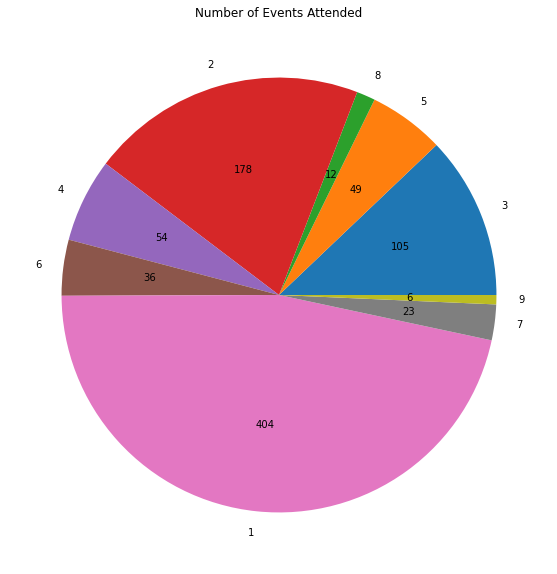

In [46]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy

def absolute_value(val):
    a  = numpy.round(val/100.*sum(slices), 0)
    return int(a)

plt.figure(figsize=(10,10))
res = Counter(num_attended.values())

print(res)
labels2 = []
slices = []

for key in res:
    labels2.append(key)
    slices.append(res[key])

plt.pie(slices, labels=labels2, autopct=absolute_value)
plt.title('Number of Events Attended')
plt.savefig('Number of Events Attended.png')

In [49]:
longest = len(max(minute_lists, key=len))
# extend minute lists to be of same length
for i in range(len(cols)):
    minute_lists[i].extend(np.full(longest-len(minute_lists[i]),np.nan))

# CREATE DATA FRAME!!!
df = pd.DataFrame()

# name columns and assign minute attendances
for i in range(len(cols)):
    df[cols[i]] = minute_lists[i]

df.head()

fig = go.Figure([{
    'x': df.index,
    'y': df[col],
    'name': col
}  for col in df.columns])

# fig.show()
fig.update_xaxes(title_text='Time (minutes)')
fig.update_yaxes(title_text='Attendees')
fig.write_image("event attendance.png")
fig.show()

### section for combining into one csv

In [ ]:
# combine and export
# combined_csv = pd.concat(file_df_list)
# combined_csv.to_csv( "combined_attendance.csv", index=False, encoding='utf-8-sig')
# print("success!!")

In [ ]:
import plotly.graph_objects as go

lst0 = ['lst1', 'lst2', 'lst3']
lst1 = [1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4]
lst2 = [1,3,6,9,14,16,17,16,17,14,13,19,17,16,15,14,10,8,4,0]
lst3 = [1,2,3,4,5,6,7,8,6,5,3]
lst_lst = [lst1, lst2, lst3]

df = pd.DataFrame()
for i in range(len(lst0)):
    lst_lst[i].extend(np.full(len(max(lst_lst))-len(lst_lst[i]),np.nan))

for i in range(len(lst0)):
    df[lst0[i]] = lst_lst[i]

print(df.head())

fig = go.Figure([{
    'x': df.index,
    'y': df[col],
    'name': col
}  for col in df.columns])

fig.show()


In [ ]:
lst0 = ['lst1', 'lst2', 'lst3']
lst1 = [1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4]
lst2 = [1,3,6,9,14,16,17,16,17,14,13,19,17,16,15,14,10,8,4,0]
lst3 = [1,2,3,4,5,6,7,8,6,5,3]
lst_lst = [lst1, lst2, lst3]

print(len(max(lst_lst)))
